In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns


In [2]:
train = torch.load("X_train.p")
test = torch.load("X_test.p")


In [3]:
print(train.shape, train.dtype)
print(test.shape, test.dtype)


torch.Size([3135, 41, 10]) torch.float32
torch.Size([3135, 6, 10]) torch.float32


In [9]:
def whiten(A, pipeline=None):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import RobustScaler
    from sklearn.pipeline import Pipeline

    if not pipeline:
        pipeline = Pipeline(
            [
                ("scale", RobustScaler()),
                ("pca", PCA(n_components=min(A.shape[0], A.shape[1]))),
            ]
        ).fit(A)
    return torch.tensor(pipeline.transform(A)), pipeline


In [5]:
def pp(A):
    A = A.reshape(-1, A.size(-1))
    print("ok")
    A = A[torch.randint(0, A.size(0), (100,)), :]
    
    print(A.shape)
    sns.pairplot(pd.DataFrame(A), diag_kind='kde')


In [6]:
# train = train.reshape(-1, train.size(-1))
# test = test.reshape(-1, train.size(-1))
# train[:, 1:], pipeline = whiten(train[:, 1:])
# test[:, 1:], pipeline = whiten(test[:, 1:])

ok
torch.Size([100, 10])


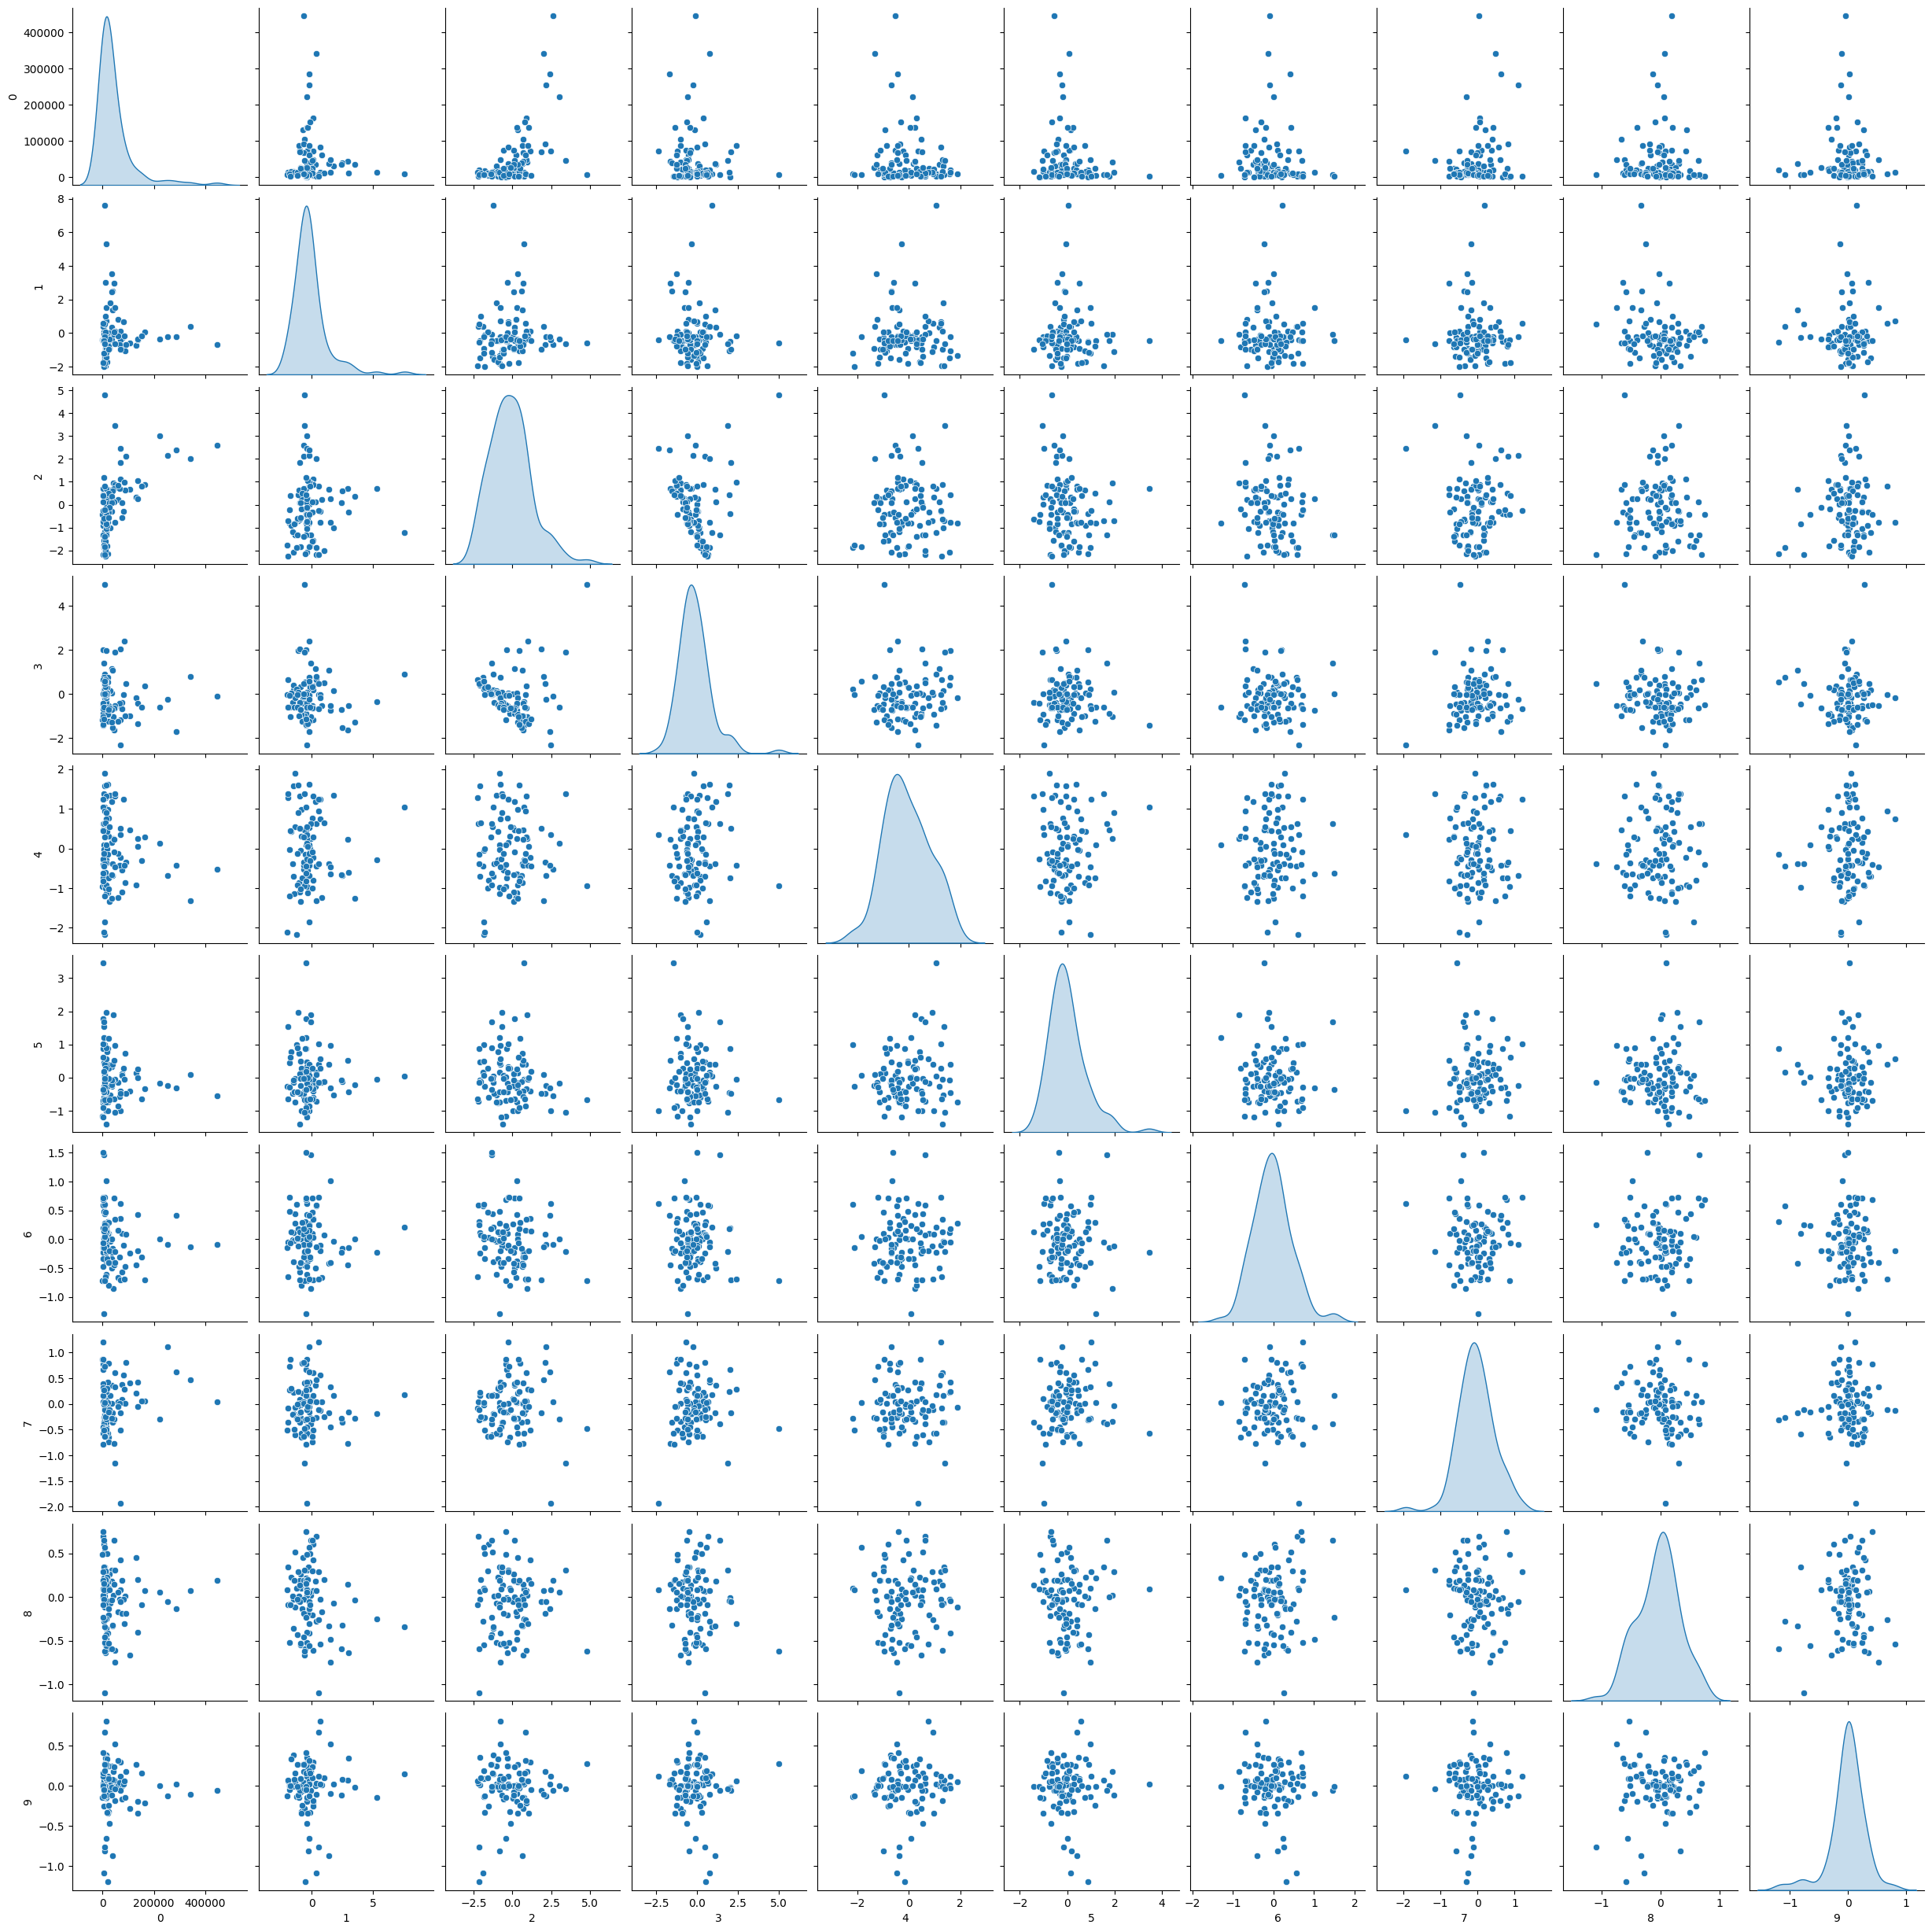

In [7]:
pp(test)

In [15]:
from data import month_number, mmmyy_to_yyyymmdd

In [16]:
FEATURE_NAMES, TARGET_NAME = [
    # from census_starter.csv
    "population",
    "pct_bb",
    "pct_college",
    "pct_foreign_born",
    "pct_it_workers",
    "median_hh_inc",
    # from VF_indcom_counties_Q222.csv
    "avg_traffic",
    "gmv_rank",
    "merchants_rank",
    "orders_rank",
    # from big_data
    "hrhhid2",
    "HUFINAL",
    "OCCURNUM",
    "HUINTTYP",
    "HURESPLI",
    "HUPRSCNT",
    "HUBUS",
    "HRMIS",
    "HRMONTH",
    "HRYEAR4",
    "HRLONGLK",
    "qstnum",
    "gereg",
    "gestfips",
    "gediv",
    "hehousut",
    "hxhousut",
    "hephoneo",
    "hxphoneo",
    "hxtelavl",
    "hetelhhd",
    "hxtelhhd",
    "hrhtype",
    "hrintsta",
    "hrnumhou",
    "hefaminc",
    "hxfaminc",
    "hwhhwgt",
    "hwhhwtln",
    "PULINENO",
    "PUCHINHH",
    "PUWK",
    "PUSLFPRX",
    "perrp",
    "pxrrp",
    "pxage",
    "peafnow",
    "pxafnow",
    "pesex",
    "pxsex",
    "pemaritl",
    "pxmaritl",
    "pxrace1",
    "pehspnon",
    "pxhspnon",
    "peeduca",
    "pxeduca",
    "peafever",
    "pxafever",
    "pxafwhn1",
    "pxspouse",
    "penatvty",
    "pemntvty",
    "pefntvty",
    "pxdipged",
    "pxhgcomp",
    "pxcyc",
    "pxpar1",
    "pxpar2",
    "pxpar1typ",
    "pxpar2typ",
    "prmarsta",
    "ptdtrace",
    "prpertyp",
    "prfamnum",
    "prfamtyp",
    "prfamrel",
    "prnmchld",
    "prchld",
    "prcitflg",
    "prcitshp",
    "prinuyer",
    "prtage",
    "prtfage",
    "pxcohab",
    "pemlr",
    "pxhrftpt",
    "pxmlr",
    "prcivlf",
    "premphrs",
    "prempnot",
    "prwksch",
    "prwkstat",
    "pxpdemp1",
    "pxnmemp1",
    "prioelg",
    "prerelg",
    "pedisear",
    "pediseye",
    "pedisrem",
    "pedisphy",
    "pedisdrs",
    "pedisout",
    "pxdisear",
    "pxdiseye",
    "pxdisrem",
    "pxdisphy",
    "pxdisdrs",
    "pxdisout",
    "prdisflg",
    "pecert1",
    "pxcert1",
    "pxcert2",
    "pxcert3",
    "pwsswgt",
    "pwlgwgt",
    "pwvetwgt",
    "pworwgt",
    "pwfmwgt",
    "pwcmpwgt",
    "pthr",
    "ptwk",
    "ptot",
    "hrhhid",
    "gtcbsa",
    "gtco",
    "gtcbsast",
    "gtcbsasz",
    "gtcsa",
    "gtmetsta",
    "gtindvpc",
    # target
    "density",
], "density"
from data import T_AVAILABLE, T_PREDICT

In [28]:
def build_big(other_features: dict):
    from os import listdir, chdir
    n_big = 121
    arr = np.full((T_AVAILABLE + T_PREDICT, n_big), fill_value=np.nan)
    for filename in listdir("big_data"):
        if "pub" not in filename:
            continue
        t = month_number(mmmyy_to_yyyymmdd(filename[:5]))
        print(filename, t)
        df = pd.read_csv(f"big_data/{filename}", low_memory=False).replace({-1: np.nan})
        df = df.apply(pd.to_numeric, errors="coerce")
        df = df.filter(items=FEATURE_NAMES)
        arr[t] = df.mean(axis=0).to_numpy()
    
    for i in range(1, arr.shape[0]):
        arr[i] = np.where(np.isnan(arr[i]), arr[i - 1], arr[i])
    for i in range(arr.shape[0] - 2, -1, -1):
        arr[i] = np.where(np.isnan(arr[i]), arr[i + 1], arr[i])
    
    arr, _ = whiten(arr)
    return arr

In [29]:
other_features = dict()
arr = build_big(other_features)

oct20pub.csv 14
feb22pub.csv 30
apr20pub.csv 8
jan21pub.csv 17
dec21pub.csv 28
jul21pub.csv 23
dec20pub.csv 16
jul22pub.csv 35
may21pub.csv 21
jun22pub.csv 34
sep22pub.csv 37
nov22pub.csv 39
apr21pub.csv 20
jul20pub.csv 11
may22pub.csv 33
mar22pub.csv 31
jun20pub.csv 10
may20pub.csv 9
nov20pub.csv 15
jan20pub.csv 5
nov21pub.csv 27
aug21pub.csv 24
apr22pub.csv 32
jan22pub.csv 29
oct21pub.csv 26
feb21pub.csv 18
jun21pub.csv 22
aug20pub.csv 12
oct22pub.csv 38
mar20pub.csv 7
sep20pub.csv 13
dec22pub.csv 40
feb20pub.csv 6
aug22pub.csv 36
sep21pub.csv 25
mar21pub.csv 19


In [50]:
# torch.save(arr, "big.p")

In [76]:
arr = torch.load("big.p")

In [79]:
# pp(torch.tensor(arr[:, :5]))
# arr[:, :35].std(dim=0)


torch.Size([47, 47])